# Discretization
- Uniform (equal width) -> handles outliers
- quantile (equal frequency) -> handles outliers and gives uniform spread
- kmeans -> clusters similar data points

## Data collection

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Datasets/Titanic-Dataset.csv',usecols = ['Survived','Age','Fare'])

In [3]:
df.sample(5)

,Survived,Age,Fare
76,0,NaN,7.8958
18,0,31.0,18.0000
816,0,23.0,7.9250
125,1,12.0,11.2417
727,1,NaN,7.7375


In [4]:
df.shape

(891, 3)

In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.shape

(714, 3)

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X  = df.iloc[:, 1:]
y = df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Finding accuracy before binning

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6293706293706294

In [13]:
accuracy_before = cross_val_score(dt,X,y,scoring = 'accuracy',cv=10).mean()
accuracy_before

0.6387128325508606

## Binning

In [14]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [15]:
kbins_age = KBinsDiscretizer(encode = 'ordinal',strategy = 'quantile', n_bins = 10)
kbins_fare = KBinsDiscretizer(encode = 'ordinal',strategy = 'quantile', n_bins = 10)

In [16]:
trf = ColumnTransformer([('first',kbins_age,[0]),
                         ('second',kbins_fare,[1])],
                       remainder = 'passthrough')

In [17]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [18]:
dt2 = DecisionTreeClassifier()

In [19]:
dt2.fit(X_train_transformed,y_train)
y_pred2 = dt2.predict(X_test_transformed)

accuracy_score(y_test,y_pred2)

0.6853146853146853

In [20]:
X_transformed = trf.fit_transform(X)
accuracy_after = cross_val_score(dt2, X_transformed, y, cv = 10, scoring = 'accuracy').mean()
accuracy_after

0.682140062597809

In [21]:
print("accuracy_before = ",accuracy_before)
print("accuracy_after = ",accuracy_after)

accuracy_before =  0.6387128325508606
accuracy_after =  0.682140062597809


### Below is a function that can calculate accuracy and even plot visualizations after binning using the three discretization strategy

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
def discretizer(n_bins, strategy):
    dt_func = DecisionTreeClassifier()
    k_bins_age = KBinsDiscretizer(n_bins = n_bins, strategy = strategy, encode = 'ordinal')
    k_bins_fare = KBinsDiscretizer(n_bins = n_bins, strategy = strategy, encode = 'ordinal')
    trf2 = ColumnTransformer([('age',k_bins_age,[0]),
                              ('fare',k_bins_fare,[1])],
                            remainder = 'passthrough')
    X_transform = trf2.fit_transform(X)
    print(f"Accuracy_after {strategy} = {cross_val_score(dt_func,X_transform,y,cv=10,scoring = 'accuracy').mean()}")

    X_transform = pd.DataFrame(X_transform, columns = X.columns)

    for col in X.columns:
        plt.figure(figsize = (14,4))
        plt.subplot(121)
        sns.histplot(X[col])
        plt.title(f'{col} before binning')
        
        plt.subplot(122)
        sns.histplot(X_transform[col],color = 'red')
        plt.title(f'{col} after binning')
        
        plt.show()
    

Accuracy_after uniform = 0.6864632237871675


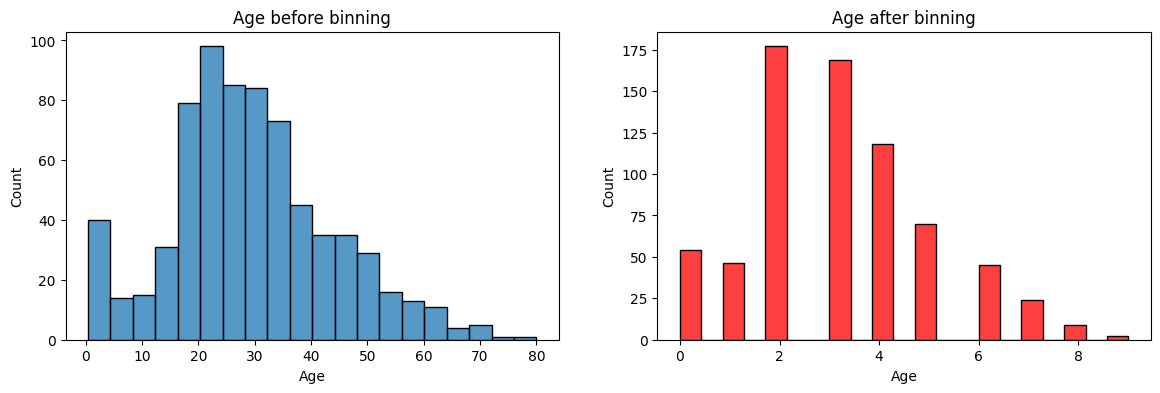

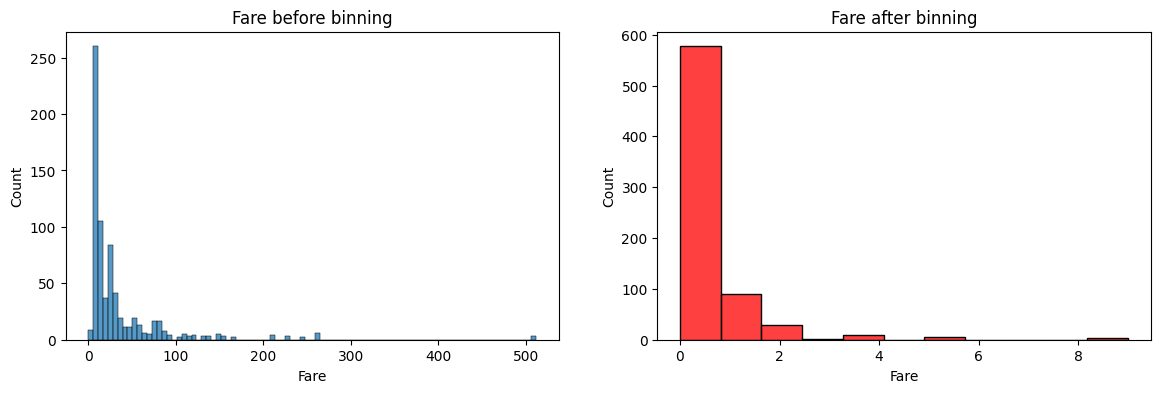

In [23]:
discretizer(10,'uniform')

Accuracy_after quantile = 0.682140062597809


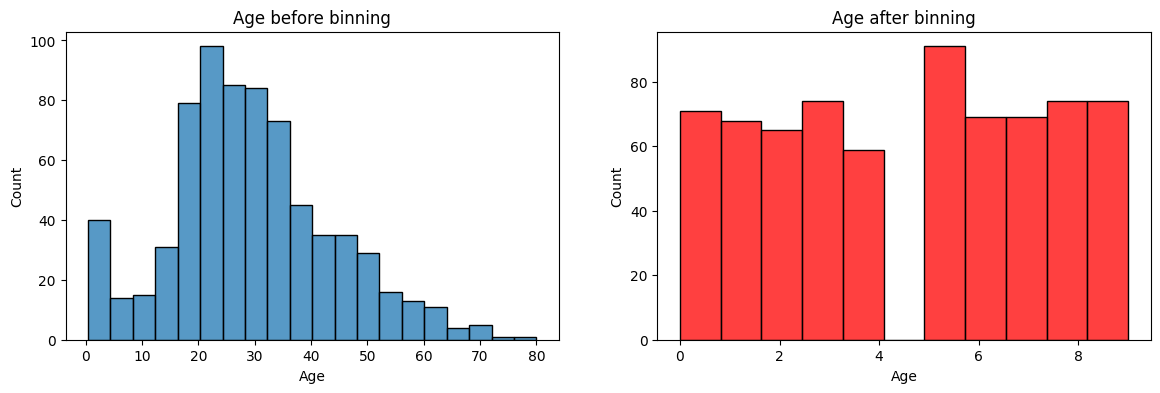

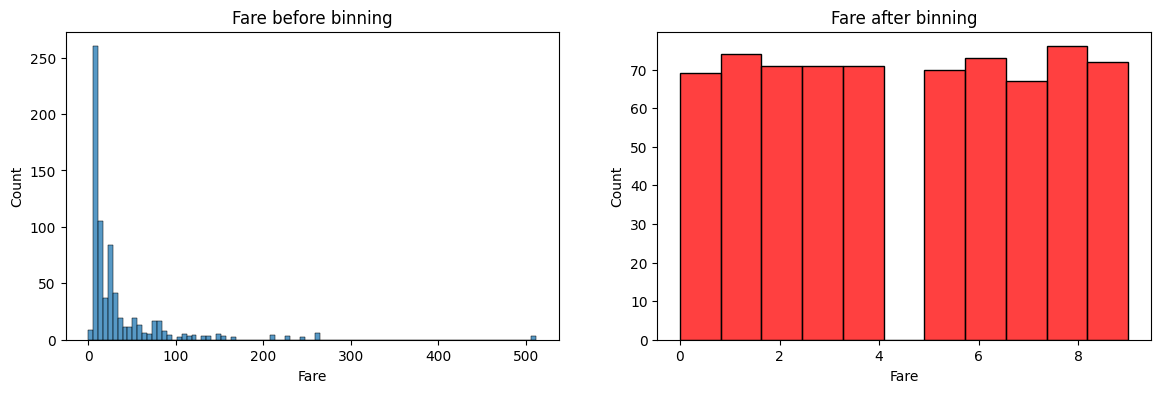

In [24]:
discretizer(10,'quantile')

Accuracy_after kmeans = 0.6655320813771518


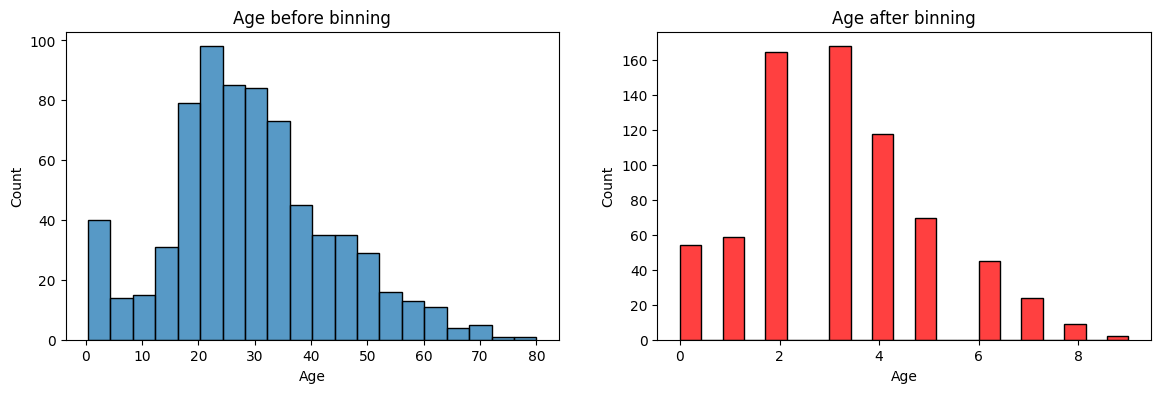

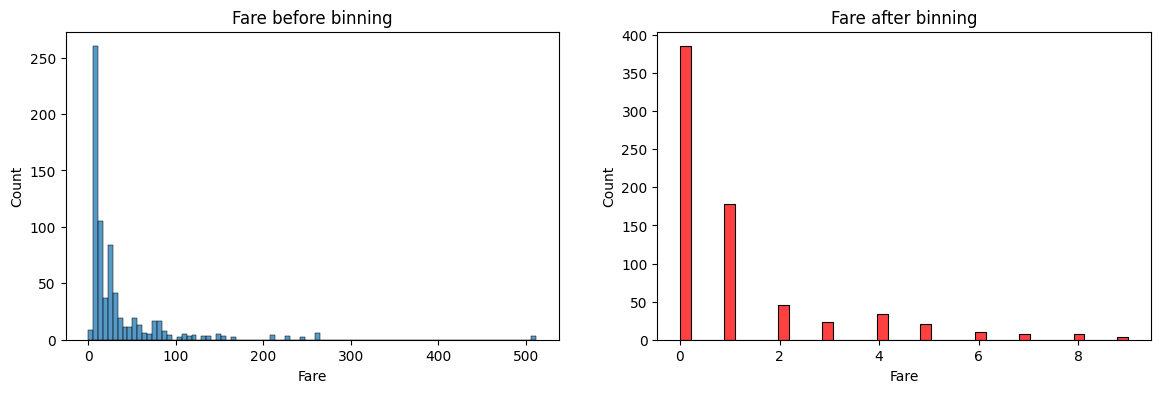

In [25]:
discretizer(10,'kmeans')